# Concept drift

In online machine learning, it is assumed that data can change over time. When building machine learning models, we assume data has a probability distribution, which is usually fixed, i.e., stationary. Changes in the data distribution give rise to the phenomenon called **Concept drift**. Such drifts can be either _virtual_ or _real_. In virtual drifts, only the distribution of the features, $P(X)$, changes, whereas the relationship between $X$ (features) and the target, $y$, remains unchanged. The joint probability of $P(X, y)$ changes in real concept drifts. Consequently, non-supervised online machine learning problems might face only virtual concept drifts.

Real concept drits can be further divided in *abrupt* (happen instantly at a given point) or *gradual* (one "concept" changes to another gradually). There are other possible divisions, but they can be fit into abrupt or gradual drifts.


## Examples of concept drift


Concept drifts might happen in the electricity demand across the year, in the stock market, in buying preferences, and in the likelihood of a new movie's success, among others.

Let us consider the movie example: two movies made at different epochs can have similar features such as famous actors/directors, storyline, production budget, marketing campaigns, etc., yet it is not certain that both will be similarly successful. What the target audience *considers* is worth watching (and their money) is constantly changing, and production companies must adapt accordingly to avoid "box office flops".

Prior to the pandemics, the usage of hand sanitizers and facial masks was not widespread. When the cases of COVID-19 started increasing, there was a lack of such products for the final consumer. Imagine a batch-learning model deciding how much of each product a supermarket should stock during those times. What a mess!

## Impact of drift on learning

Concept drift can have a significant impact on predictive performance if not handled properly. Most batch learning models will fail in the presence of concept drift as they are essentially trained on different data. On the other hand, stream learning methods continuously update themselves and adapt to new concepts. Furthermore, drift-aware methods use change detection methods (a.k.a. drift detectors) to trigger *mitigation mechanisms* if a change in performance is detected.

## Detecting concept drift

Multiple drift detection methods have been proposed. The goal of a drift detector is to signal an alarm in the presence of drift. A good drift detector maximizes the number of true positives while keeping the number of false positives to a minimum. It must also be resource-wise efficient to work in the context of infinite data streams.

For this example, we will generate a synthetic data stream by concatenating 3 distributions of 1000 samples each:

- $dist_a$: $\mu=0.8$, $\sigma=0.05$
- $dist_b$: $\mu=0.4$, $\sigma=0.02$
- $dist_c$: $\mu=0.6$, $\sigma=0.1$.

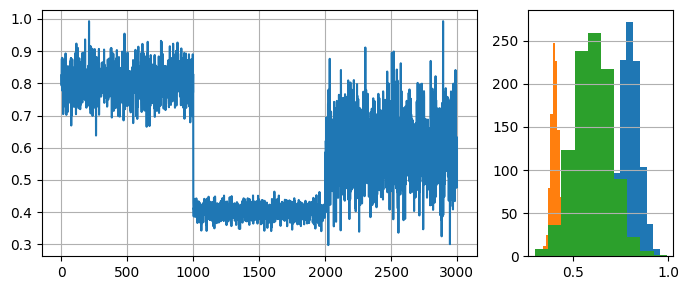

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Generate data for 3 distributions
random_state = np.random.RandomState(seed=42)
dist_a = random_state.normal(0.8, 0.05, 1000)
dist_b = random_state.normal(0.4, 0.02, 1000)
dist_c = random_state.normal(0.6, 0.1, 1000)

# Concatenate data to simulate a data stream with 2 drifts
stream = np.concatenate((dist_a, dist_b, dist_c))

# Auxiliary function to plot the data
def plot_data(dist_a, dist_b, dist_c, drifts=None):
    fig = plt.figure(figsize=(7,3), tight_layout=True)
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    ax1, ax2 = plt.subplot(gs[0]), plt.subplot(gs[1])
    ax1.grid()
    ax1.plot(stream, label='Stream')
    ax2.grid(axis='y')
    ax2.hist(dist_a, label=r'$dist_a$')
    ax2.hist(dist_b, label=r'$dist_b$')
    ax2.hist(dist_c, label=r'$dist_c$')
    if drifts is not None:
        for drift_detected in drifts:
            ax1.axvline(drift_detected, color='red')
    plt.show()

plot_data(dist_a, dist_b, dist_c)

### Drift detection test

We will use the ADaptive WINdowing (`ADWIN`) drift detection method. Remember that the goal is to indicate that drift has occurred after samples **1000** and **2000** in the synthetic data stream.

Change detected at index 1055
Change detected at index 2079


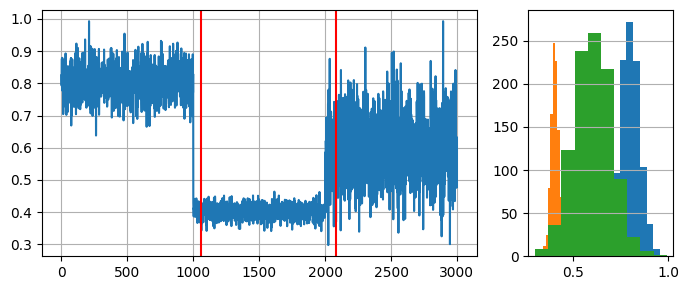

In [2]:
from river import drift

drift_detector = drift.ADWIN()
drifts = []

for i, val in enumerate(stream):
    drift_detector.update(val)   # Data is processed one sample at a time
    if drift_detector.drift_detected:
        # The drift detector indicates after each sample if there is a drift in the data
        print(f'Change detected at index {i}')
        drifts.append(i)

plot_data(dist_a, dist_b, dist_c, drifts)

We see that `ADWIN` successfully indicates the presence of drift (red vertical lines) close to the begining of a new data distribution.


---
We conclude this example with some remarks regarding concept drift detectors and their usage:

- In practice, drift detectors provide stream learning methods with robustness against concept drift. Drift detectors monitor the model usually through a performance metric.
- Drift detectors work on univariate data. This is why they are used to monitor a model's performance and not the data itself. Remember that concept drift is defined as a change in the relationship between data and the target to learn (in supervised learning).
- Drift detectors define their expectations regarding input data. It is important to know these expectations to feed a given drift detector with the correct data.
